# <span style="color:orange">25/05 - Pair Regresión 1- Alicia y Lidia</span>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 1.Buscar un conjunto de datos a analizar:
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas y limpio.

In [68]:
df = pd.read_csv('animes.csv', index_col=0)
df.head()

,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
uid,,,,,,,,,,,
28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25,489888,141,25,9,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22,995473,28,24,9,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13,581663,98,23,9,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64,1615084,4,1,9,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1,214621,502,22,9,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [69]:
df = df.reset_index()

### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
-  Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.


**Hacemos una limpieza inicial de las columnas que no vamos a utilizar.**

In [40]:
df.head(2)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25,489888,141,25,9,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22,995473,28,24,9,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...


In [70]:
df.drop(['uid', 'synopsis', 'genre', 'aired', 'img_url', 'link'], axis=1, inplace=True)

In [42]:
df.columns

Index(['title', 'episodes', 'members', 'popularity', 'ranked', 'score'], dtype='object')

In [43]:
df.dtypes

title          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
dtype: object

**Vemos que hay mayusculas y minusculas en el nombre de las columnas y pasamos a ponerlas todas de un mismo tipo.**

In [44]:
nuevas_columnas = {col:col.replace(" ","_").lower()for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [45]:
df.head()

,title,episodes,members,popularity,ranked,score
0,Haikyuu!! Second Season,25,489888,141,25,9
1,Shigatsu wa Kimi no Uso,22,995473,28,24,9
2,Made in Abyss,13,581663,98,23,9
3,Fullmetal Alchemist: Brotherhood,64,1615084,4,1,9
4,Kizumonogatari III: Reiketsu-hen,1,214621,502,22,9


In [46]:
pd.set_option("display.float_format",lambda x: "%3.f" %x) #Usamos esta linea de código para que no aparezca los exponenciales
df.describe()

,episodes,members,popularity,ranked,score
count,18605,19311,19311,16099,18732
mean,11,34726,7721,6867,6
std,48,112177,4677,4390,1
min,1,25,1,1,1
25%,1,388,3725,2896,6
50%,2,2389,7539,6963,6
75%,12,14502,11613,10602,7
max,3057,1871043,16338,14675,9


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       19311 non-null  object 
 1   episodes    18605 non-null  float64
 2   members     19311 non-null  int64  
 3   popularity  19311 non-null  int64  
 4   ranked      16099 non-null  float64
 5   score       18732 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 905.3+ KB


In [48]:
df.stb.missing()

,missing,total,percent
ranked,3212,19311,17
episodes,706,19311,4
score,579,19311,3
title,0,19311,0
members,0,19311,0
popularity,0,19311,0


**Vemos que hay valores nulos y como no es un alto porcentaje, los eliminaremos sin más para poder hacer el analisis de la regresión.**

In [71]:
df = df.dropna()

In [72]:
df.stb.missing()

,missing,total,percent
title,0,15875,0
episodes,0,15875,0
members,0,15875,0
popularity,0,15875,0
ranked,0,15875,0
score,0,15875,0


In [60]:
df.shape

(15875, 6)

**Como nuestras variables tienen diferentes valores, vemos poco informativo comprobar los valores únicos(unique) y su frecuencia(value_counts).**

### 3. Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados e interpretalos.

In [73]:
x=df['popularity'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.
y= df['score'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [74]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

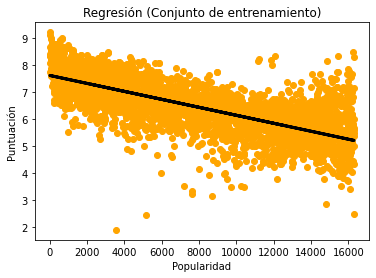

In [79]:
plt.scatter(x_test,y_test,color="orange") 
plt.plot(x_test,y_prediction,color="black",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Popularidad')
plt.ylabel('Puntuación')
plt.show()

In [80]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


Para el conjunto train:---------------
El valor de r2 score es  0.49722426402006126
El MAE es 0.5589607083493028
El MSE es 0.5468512251753882
EL RMSE es  0.7394938979973994


In [81]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto test:---------------
El valor de r2 score es  0.5103612795228363
El MAE es 0.5468981942673905
El MSE es 0.5180217849038676
EL RMSE es  0.7197373027041656


**Al calcular las métricas de nuestro conjunto de datos, observamos que r2, que debe rondar entre los valores 0-1() para que las variable elegida vaya a seguir un buen modelo de regresión lineal simple, nos da en el conjunto de entrenamiento casi 0,5 y en el de test 0,51. Así que, seguramente se ajuste al modelo, porque cuanto más cerca a 1 más ajustado está,aunque con algunas modificaciones podremos mejorarlo.**

**En cuanto a las demás métricas, cuanto menor es, mejor es capaz de ajustar los datos. Y comprobamos que nuestros resultados son bajos, por lo que cumplen lo dicho anteriormente.**

**¡Vamos por buen camino!** 💪🏻

In [82]:
df.to_csv('animes1.csv')